In [21]:
import numpy
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 10))

In [22]:
def M(seq1,win_size,step):
    k=0
    list = []
    l = ""
    for i in range(len(seq1)-win_size):
        end = k+win_size
        if(k>len(seq1)):
            break
        if(end>len(seq1)):
            break
        curr_vertical_win = seq1[k:end]
        for j in range(len(curr_vertical_win)):
            l = l + curr_vertical_win[j]
        k=k+step
        list.append(l)
        l=""
    return list

In [102]:
def draw_Matrix(seqx,seqy,a,l1,l2,threshold,win_size,step):
    lx = []
    ly = []
    for i in range(len(l1)):
        for j in range(len(l2)):
            if(sum(c1 == c2 for c1, c2 in zip(l1[i], l2[j])) >= threshold):
                print("******************************************************************************************")
                print(seqy[i*step :i*step  + win_size])
                print(seqx[j*step :j*step  + win_size],end = ' no. of matches greater than threshold, plot a dot')
                print(" ")
                print("******************************************************************************************")
                row = int(win_size/2) + step*i
                col = int(win_size/2) + step*j
                a[row,col]=0
                lx.append(row)
                ly.append(col)
            else:
                print("No action taken, match less than threshold")
    return lx,ly

In [103]:
def dot_calc(seqx,seqy,threshold,win_size,step):
    l1 = M(seqy,win_size,step)
    l2 = M(seqx,win_size,step)
    a= numpy.empty((len(seqx),len(seqy)))
    a.fill(1)
    lx,ly = draw_Matrix(seqx,seqy,a,l1,l2,threshold,win_size,step)
    #print(a)
    dotplot=plt.imshow(numpy.array(a))
    xt=plt.xticks(numpy.arange(len(list(seqx))),list(seqx))
    yt=plt.yticks(numpy.arange(len(list(seqy))),list(seqy))
    plt.show()

******************************************************************************************
ACGTTGACC
ACCTTGTCC no. of matches greater than threshold, plot a dot 
******************************************************************************************
No action taken, match less than threshold
No action taken, match less than threshold
******************************************************************************************
ACGTTGACC
TCTTTGCCC no. of matches greater than threshold, plot a dot 
******************************************************************************************
No action taken, match less than threshold
******************************************************************************************
TTGACCTGT
TTGTCCTCT no. of matches greater than threshold, plot a dot 
******************************************************************************************
No action taken, match less than threshold
No action taken, match less than threshold
**************************

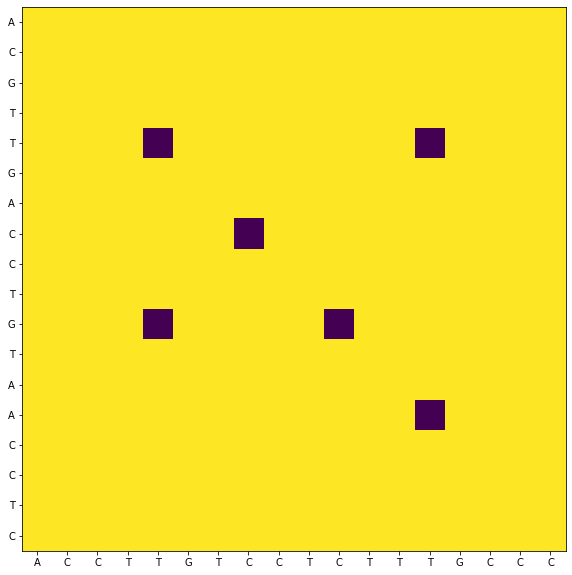

In [104]:
seqx = "ACCTTGTCCTCTTTGCCC"
seqy = "ACGTTGACCTGTAACCTC"
threshold = 4
win_size = 9
step = 3
dot_calc(seqx,seqy,threshold,win_size,step)